# Data analysis & Modeling with Python

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import *
import matplotlib as mpl 

import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import mplcyberpunk
%matplotlib inline 

pd.set_option("display.max_columns", 00) 
pd.set_option("display.max_rows",100) 

plt.style.use("cyberpunk")

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#machine learning library

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import accuracy_score,classification_report, plot_roc_curve, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

In [3]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 8
mpl.rcParams["axes.titlepad"] = 25
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] =  "white"


In [4]:
df = pd.read_csv("/storage/emulated/0/waterQuality1.csv") 

In [5]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    1000 non-null   float64
 1   ammonia      1000 non-null   float64
 2   arsenic      1000 non-null   float64
 3   barium       1000 non-null   float64
 4   cadmium      1000 non-null   float64
 5   chloramine   1000 non-null   float64
 6   chromium     1000 non-null   float64
 7   copper       1000 non-null   float64
 8   flouride     1000 non-null   float64
 9   bacteria     1000 non-null   float64
 10  viruses      1000 non-null   float64
 11  lead         1000 non-null   float64
 12  nitrates     1000 non-null   float64
 13  nitrites     1000 non-null   float64
 14  mercury      1000 non-null   float64
 15  perchlorate  1000 non-null   float64
 16  radium       1000 non-null   float64
 17  selenium     1000 non-null   float64
 18  silver       1000 non-null   float64
 19  uranium

In [15]:
pd.DataFrame({"Train/null":(df.isnull().sum()/df.shape[0]) *100}) 

,Train/null
aluminium,0.0
ammonia,0.0
arsenic,0.0
barium,0.0
cadmium,0.0
chloramine,0.0
chromium,0.0
copper,0.0
flouride,0.0
bacteria,0.0


In [16]:
df.duplicated().sum()

0

In [5]:
# target 
df["is_safe"] = df.is_safe.map({1:"yes", 0:"no"}) 

,is_safe
yes,0.651
no,0.349


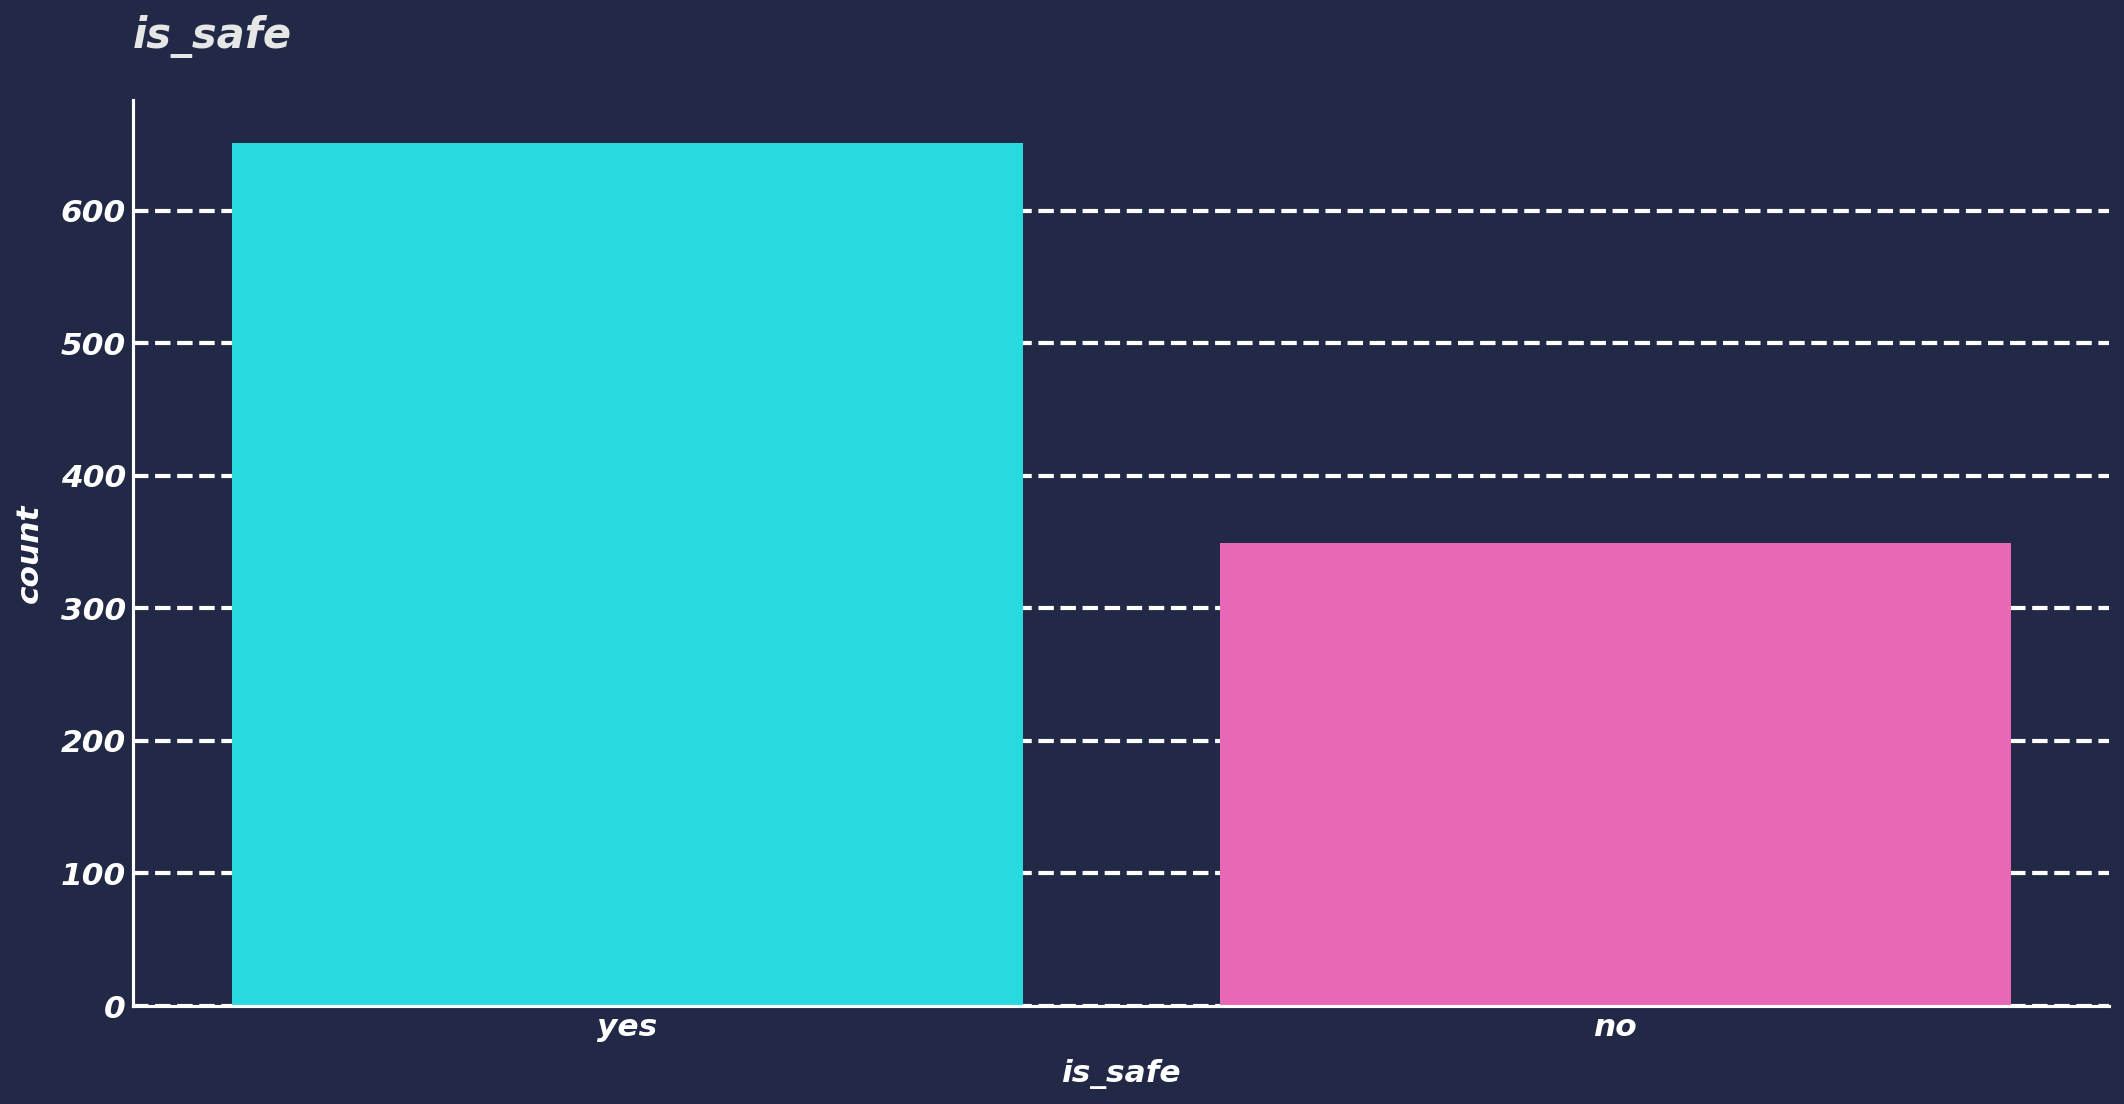

In [13]:
# target 

plt.figure(figsize=(17, 8))
sns.countplot(df.is_safe)
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.title("is_safe")

df.is_safe.value_counts(normalize=True).to_frame() 

In [14]:
df.is_safe.describe()

count     1000
unique       2
top        yes
freq       651
Name: is_safe, dtype: object

In [18]:
feature = df.drop("is_safe",axis=1)

In [19]:
feature.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2.446280,15.485030,0.025030,2.042160,0.004488,4.070580,0.443880,1.029920,0.771510,0.502910,0.382641,0.103221,9.56723,1.489360,0.005195,29.441210,4.042680,0.04970,0.246640,0.044680
std,1.433042,8.719787,0.014742,1.134923,0.002547,2.252979,0.261701,0.580523,0.435526,0.282662,0.382362,0.056014,5.53147,0.280884,0.002967,16.509726,2.273725,0.02877,0.144351,0.026915
min,0.000000,0.020000,0.001000,0.010000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,0.01000,1.000000,0.000000,0.070000,0.000000,0.00000,0.000000,0.000000
25%,1.147500,8.235000,0.010000,1.040000,0.002000,2.160000,0.210000,0.540000,0.407500,0.260000,0.005000,0.054000,4.82000,1.250000,0.003000,15.465000,2.130000,0.02750,0.120000,0.020000
50%,2.505000,15.735000,0.030000,2.030000,0.004000,4.130000,0.440000,1.050000,0.765000,0.510000,0.510000,0.105000,9.67000,1.480000,0.005000,29.390000,4.110000,0.05000,0.240000,0.050000
75%,3.670000,23.182500,0.040000,3.010000,0.007000,6.070000,0.670000,1.530000,1.160000,0.740000,0.740000,0.152000,14.35500,1.730000,0.008000,43.632500,5.962500,0.07000,0.370000,0.070000
max,5.000000,29.840000,0.050000,4.000000,0.009000,7.990000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,18.99000,2.000000,0.010000,59.740000,7.990000,0.10000,0.500000,0.090000


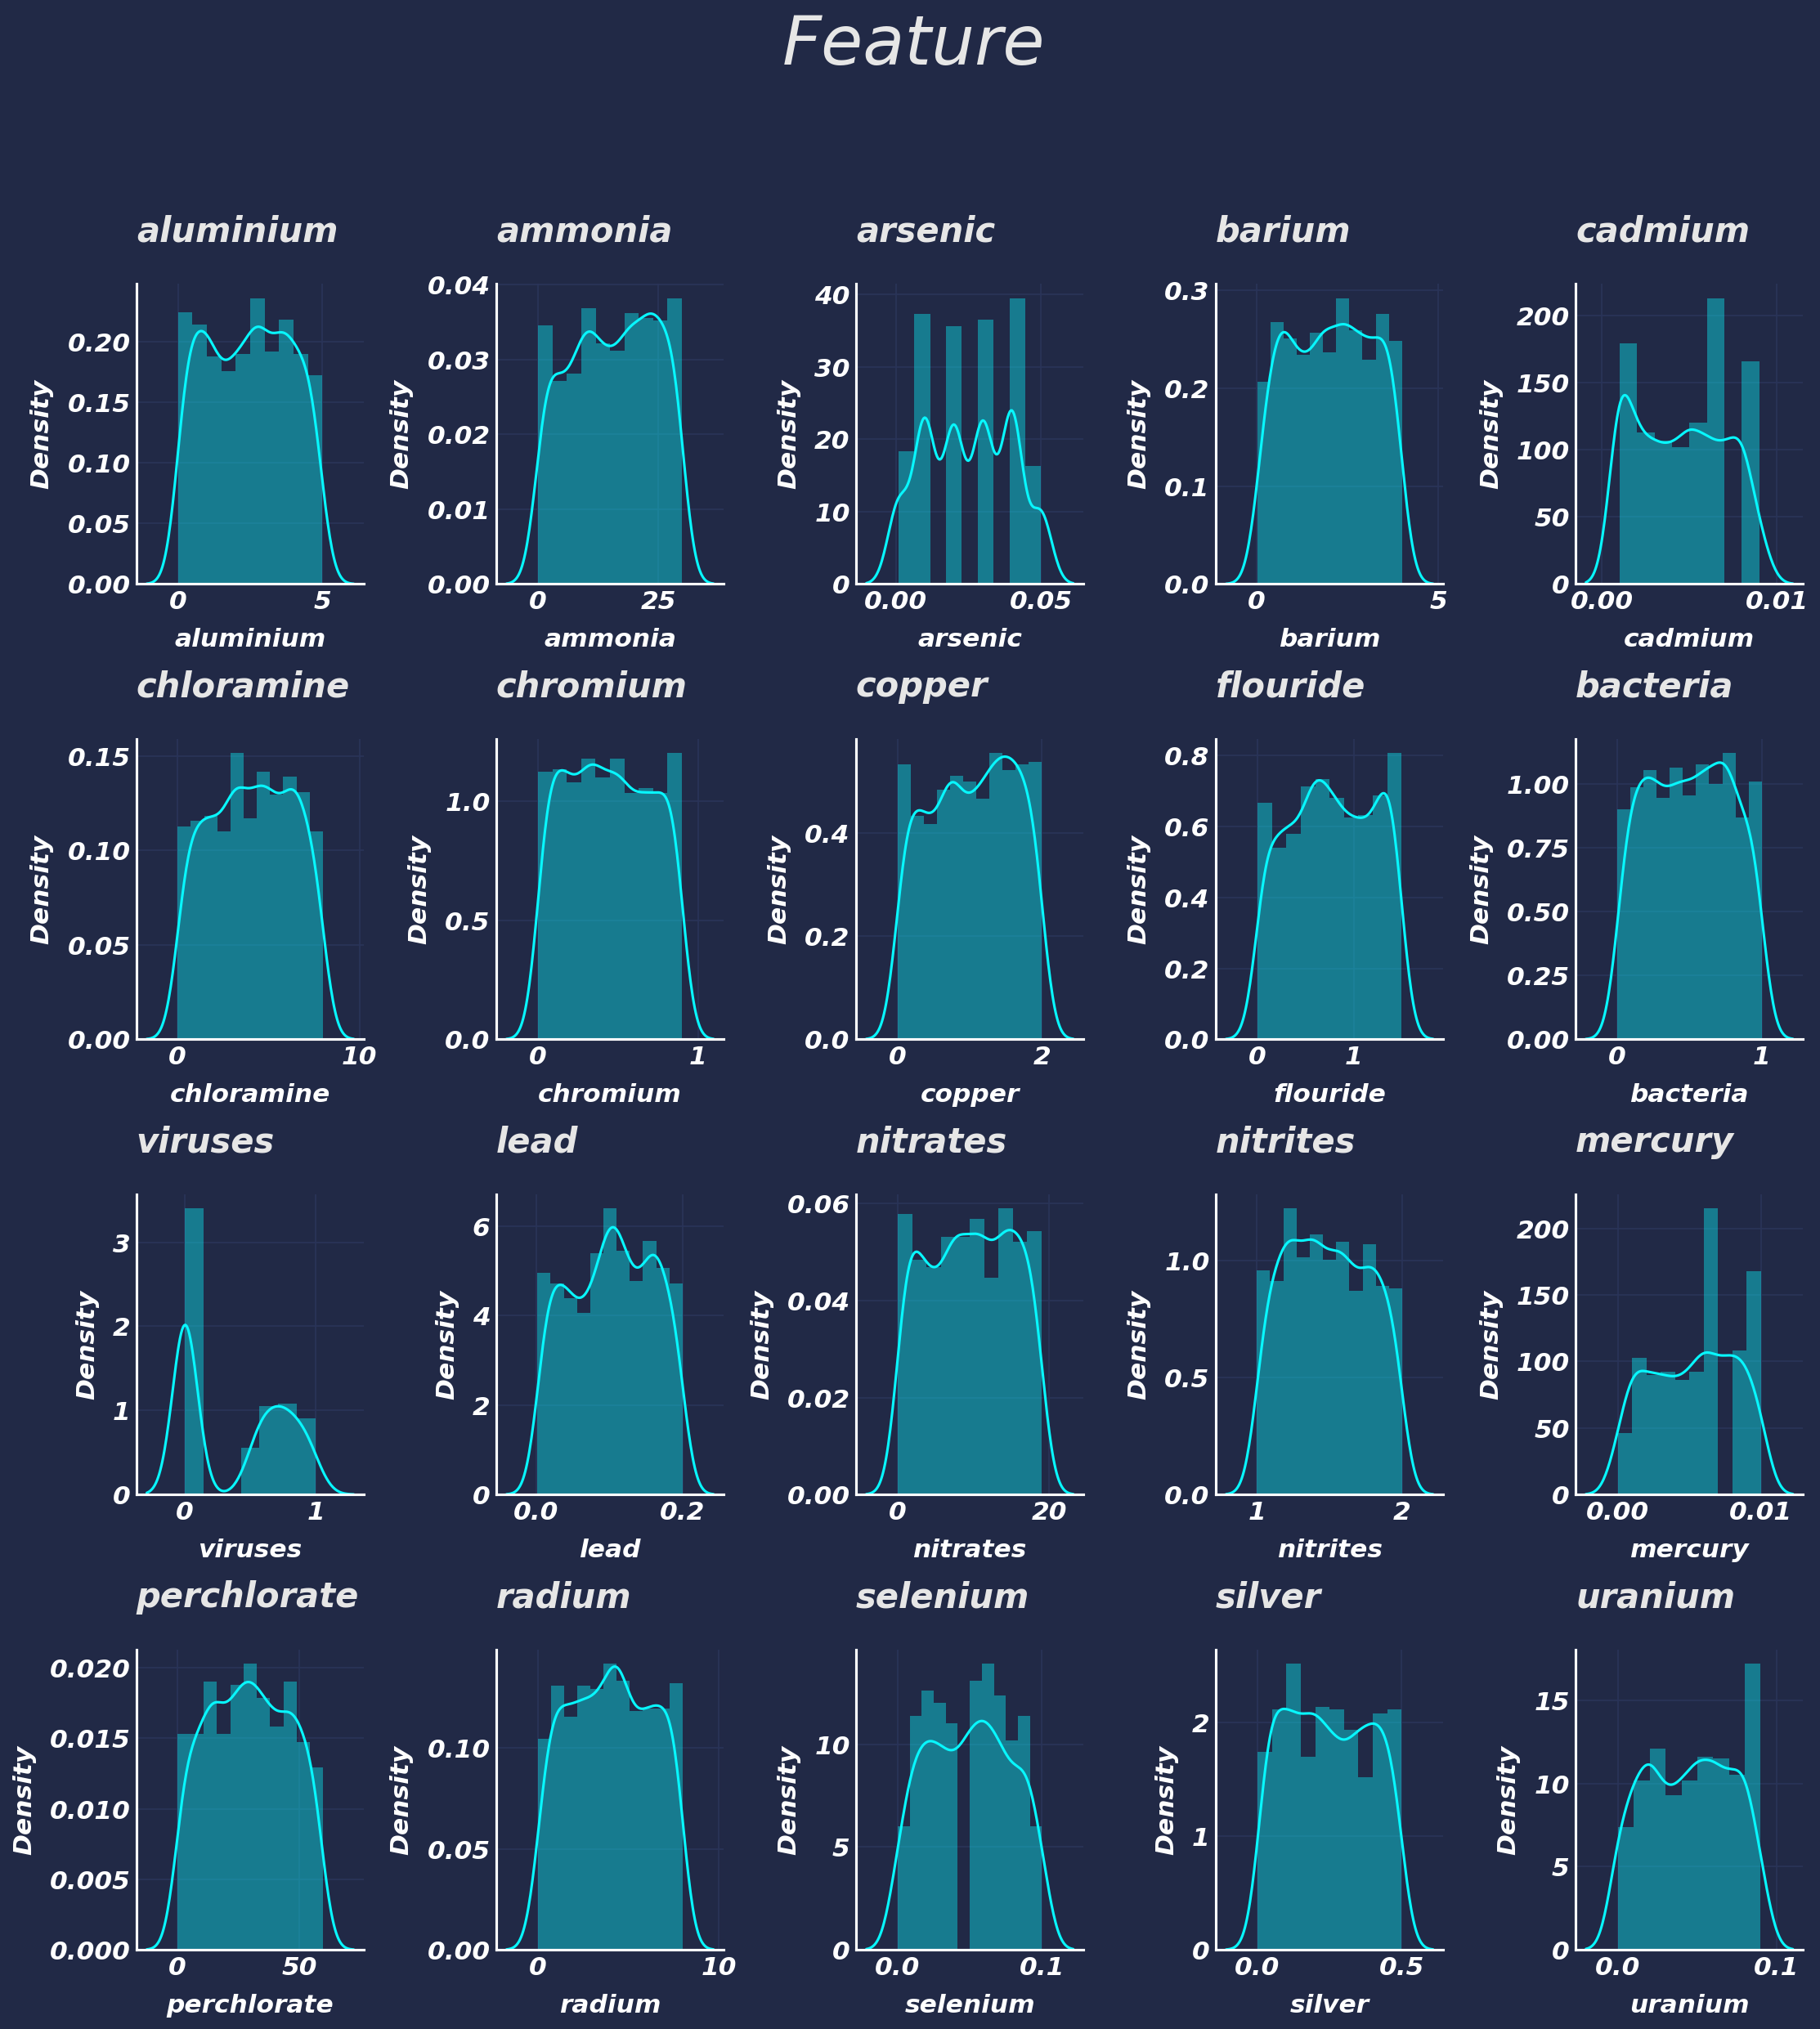

In [28]:
plt.figure(figsize=(15,15))

for i,j in enumerate(feature.columns):
    plt.subplot(4,5,i+1) 
    
    sns.distplot(feature[j])
    plt.title(j)
    
plt.suptitle("Feature",size = 40,y=1.1)
plt.tight_layout() 
plt.show() 

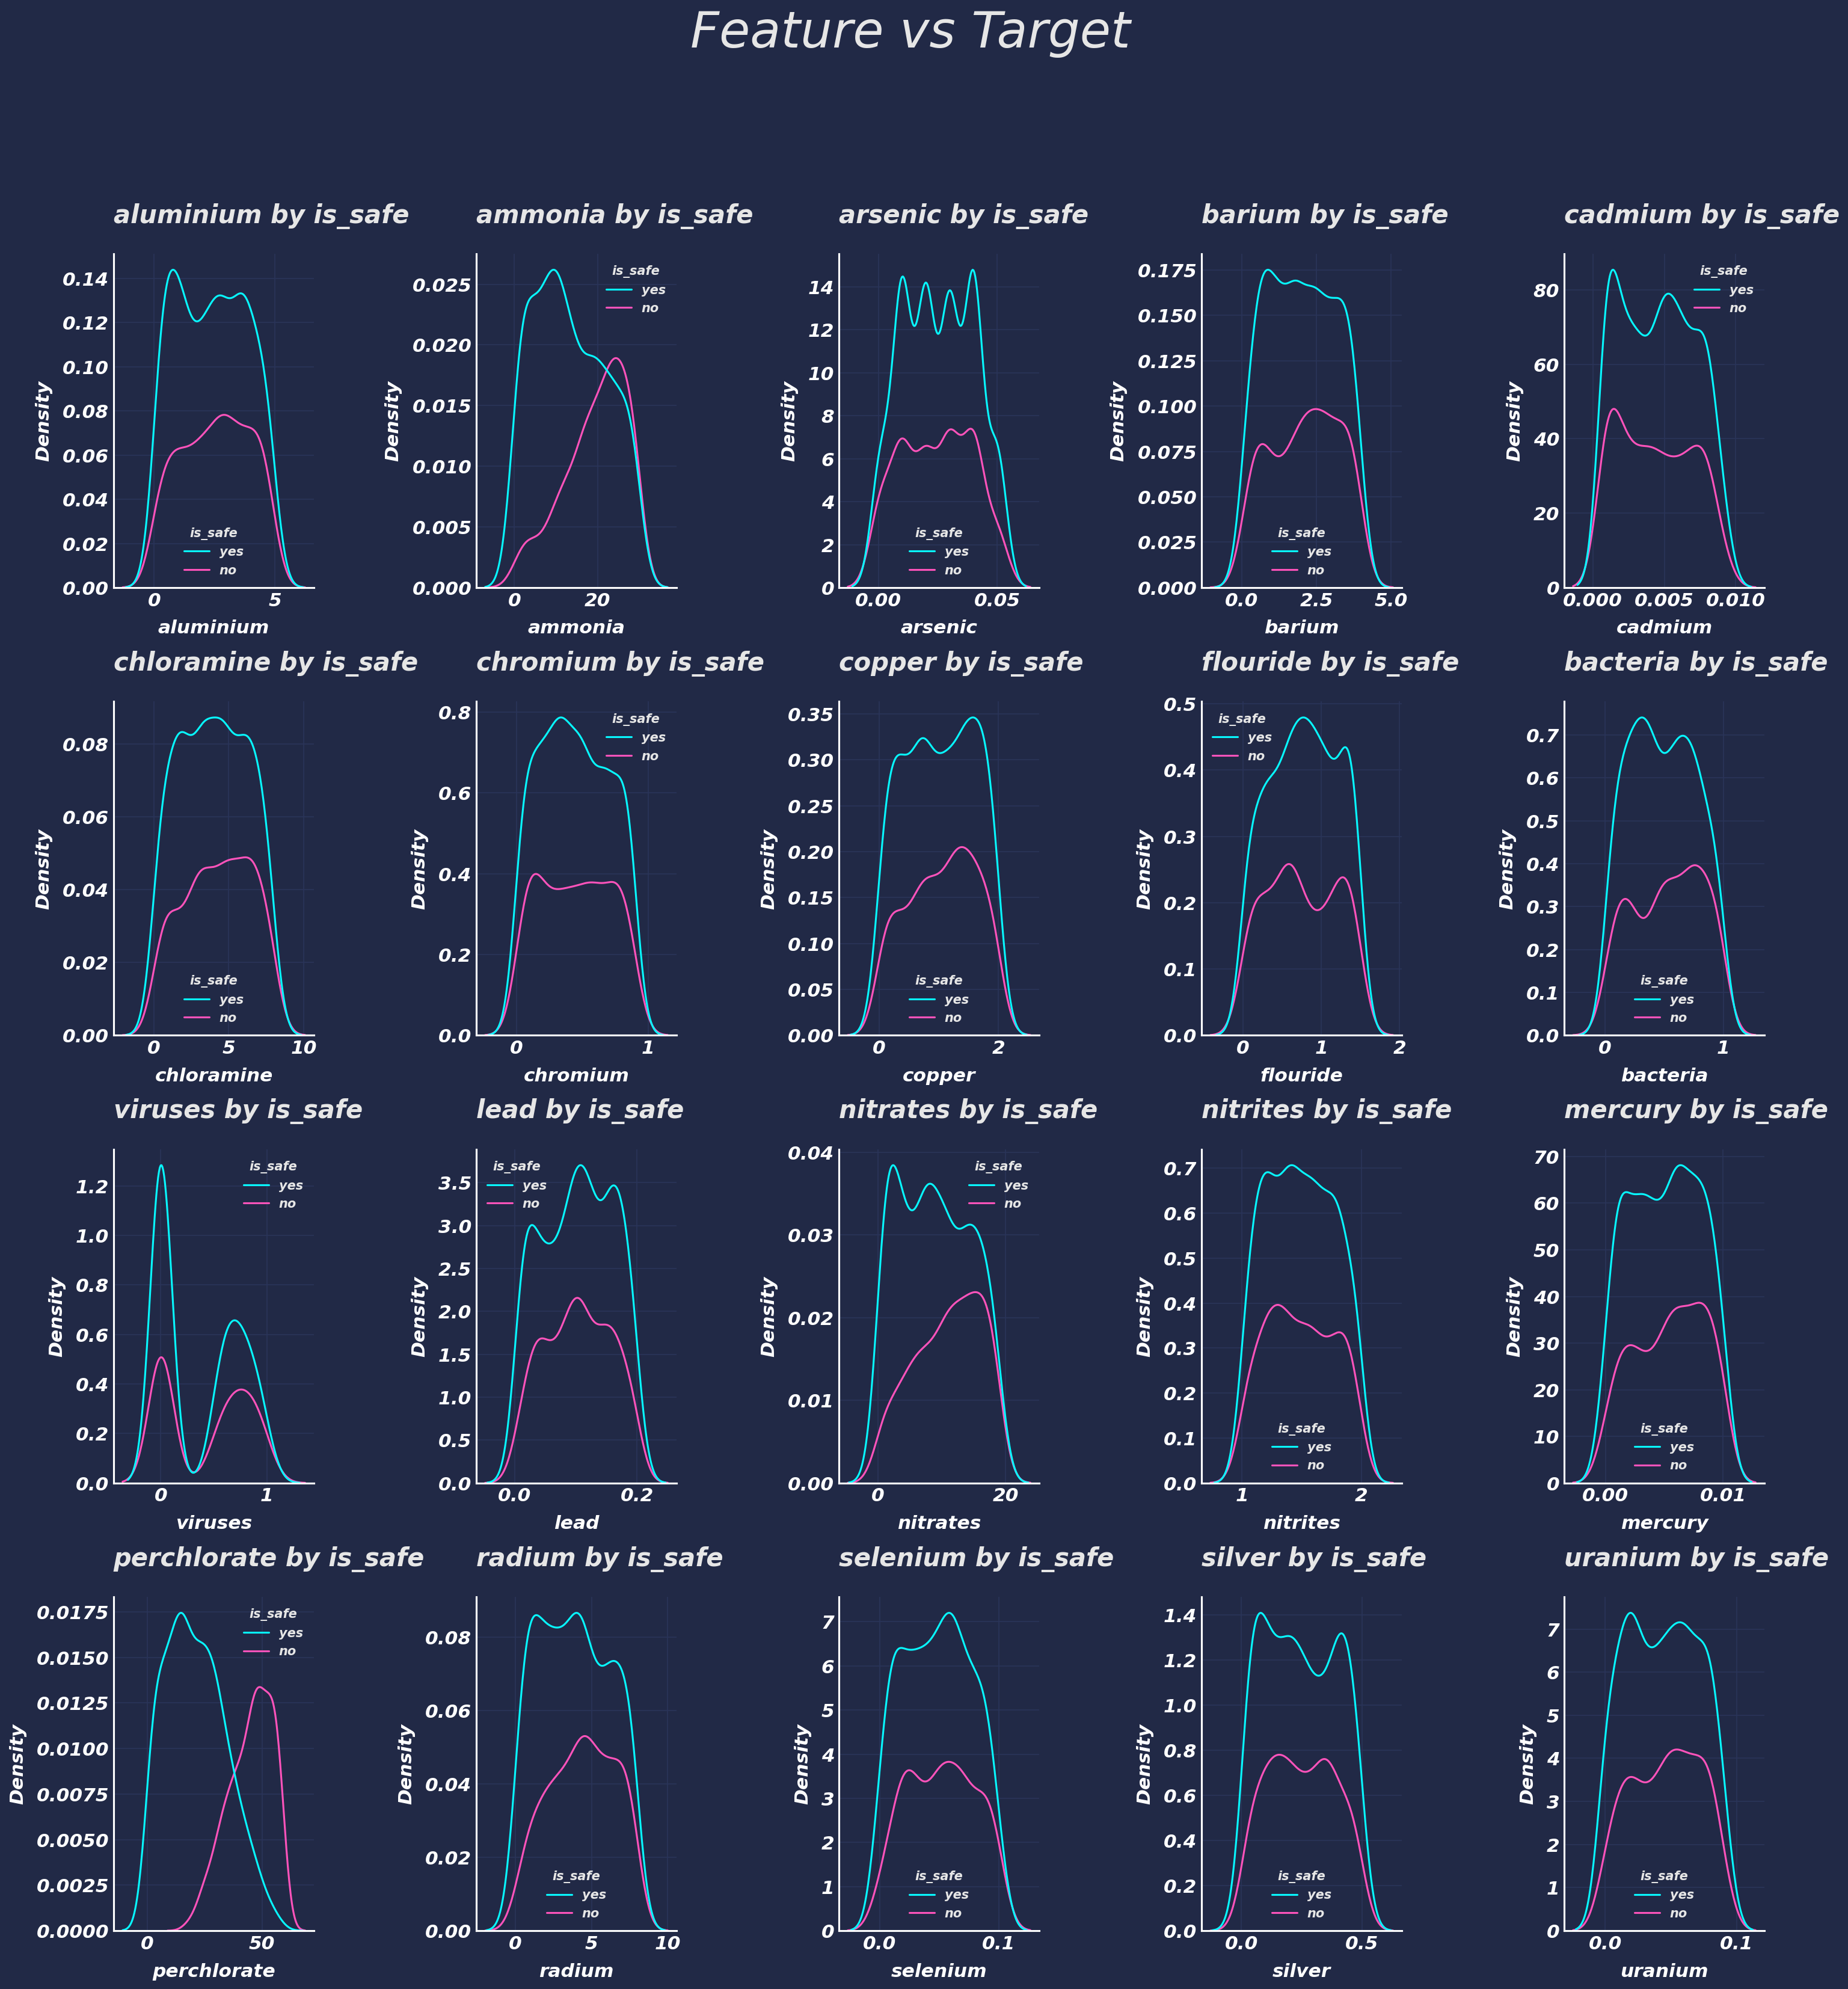

In [30]:
plt.figure(figsize=(20,20))

for i,j in enumerate(feature.columns):
    plt.subplot(4,5,i+1) 
    
    sns.kdeplot(feature[j],hue = df.is_safe)
    plt.title(j + " by is_safe")
    
plt.suptitle("Feature vs Target",size = 40,y=1.1)
plt.tight_layout() 
plt.show() 

In [34]:
yes = df.query("is_safe == 'yes'")
no = df.query("is_safe == 'no'")

Text(0.0, 1.0, 'is_safe == yes')

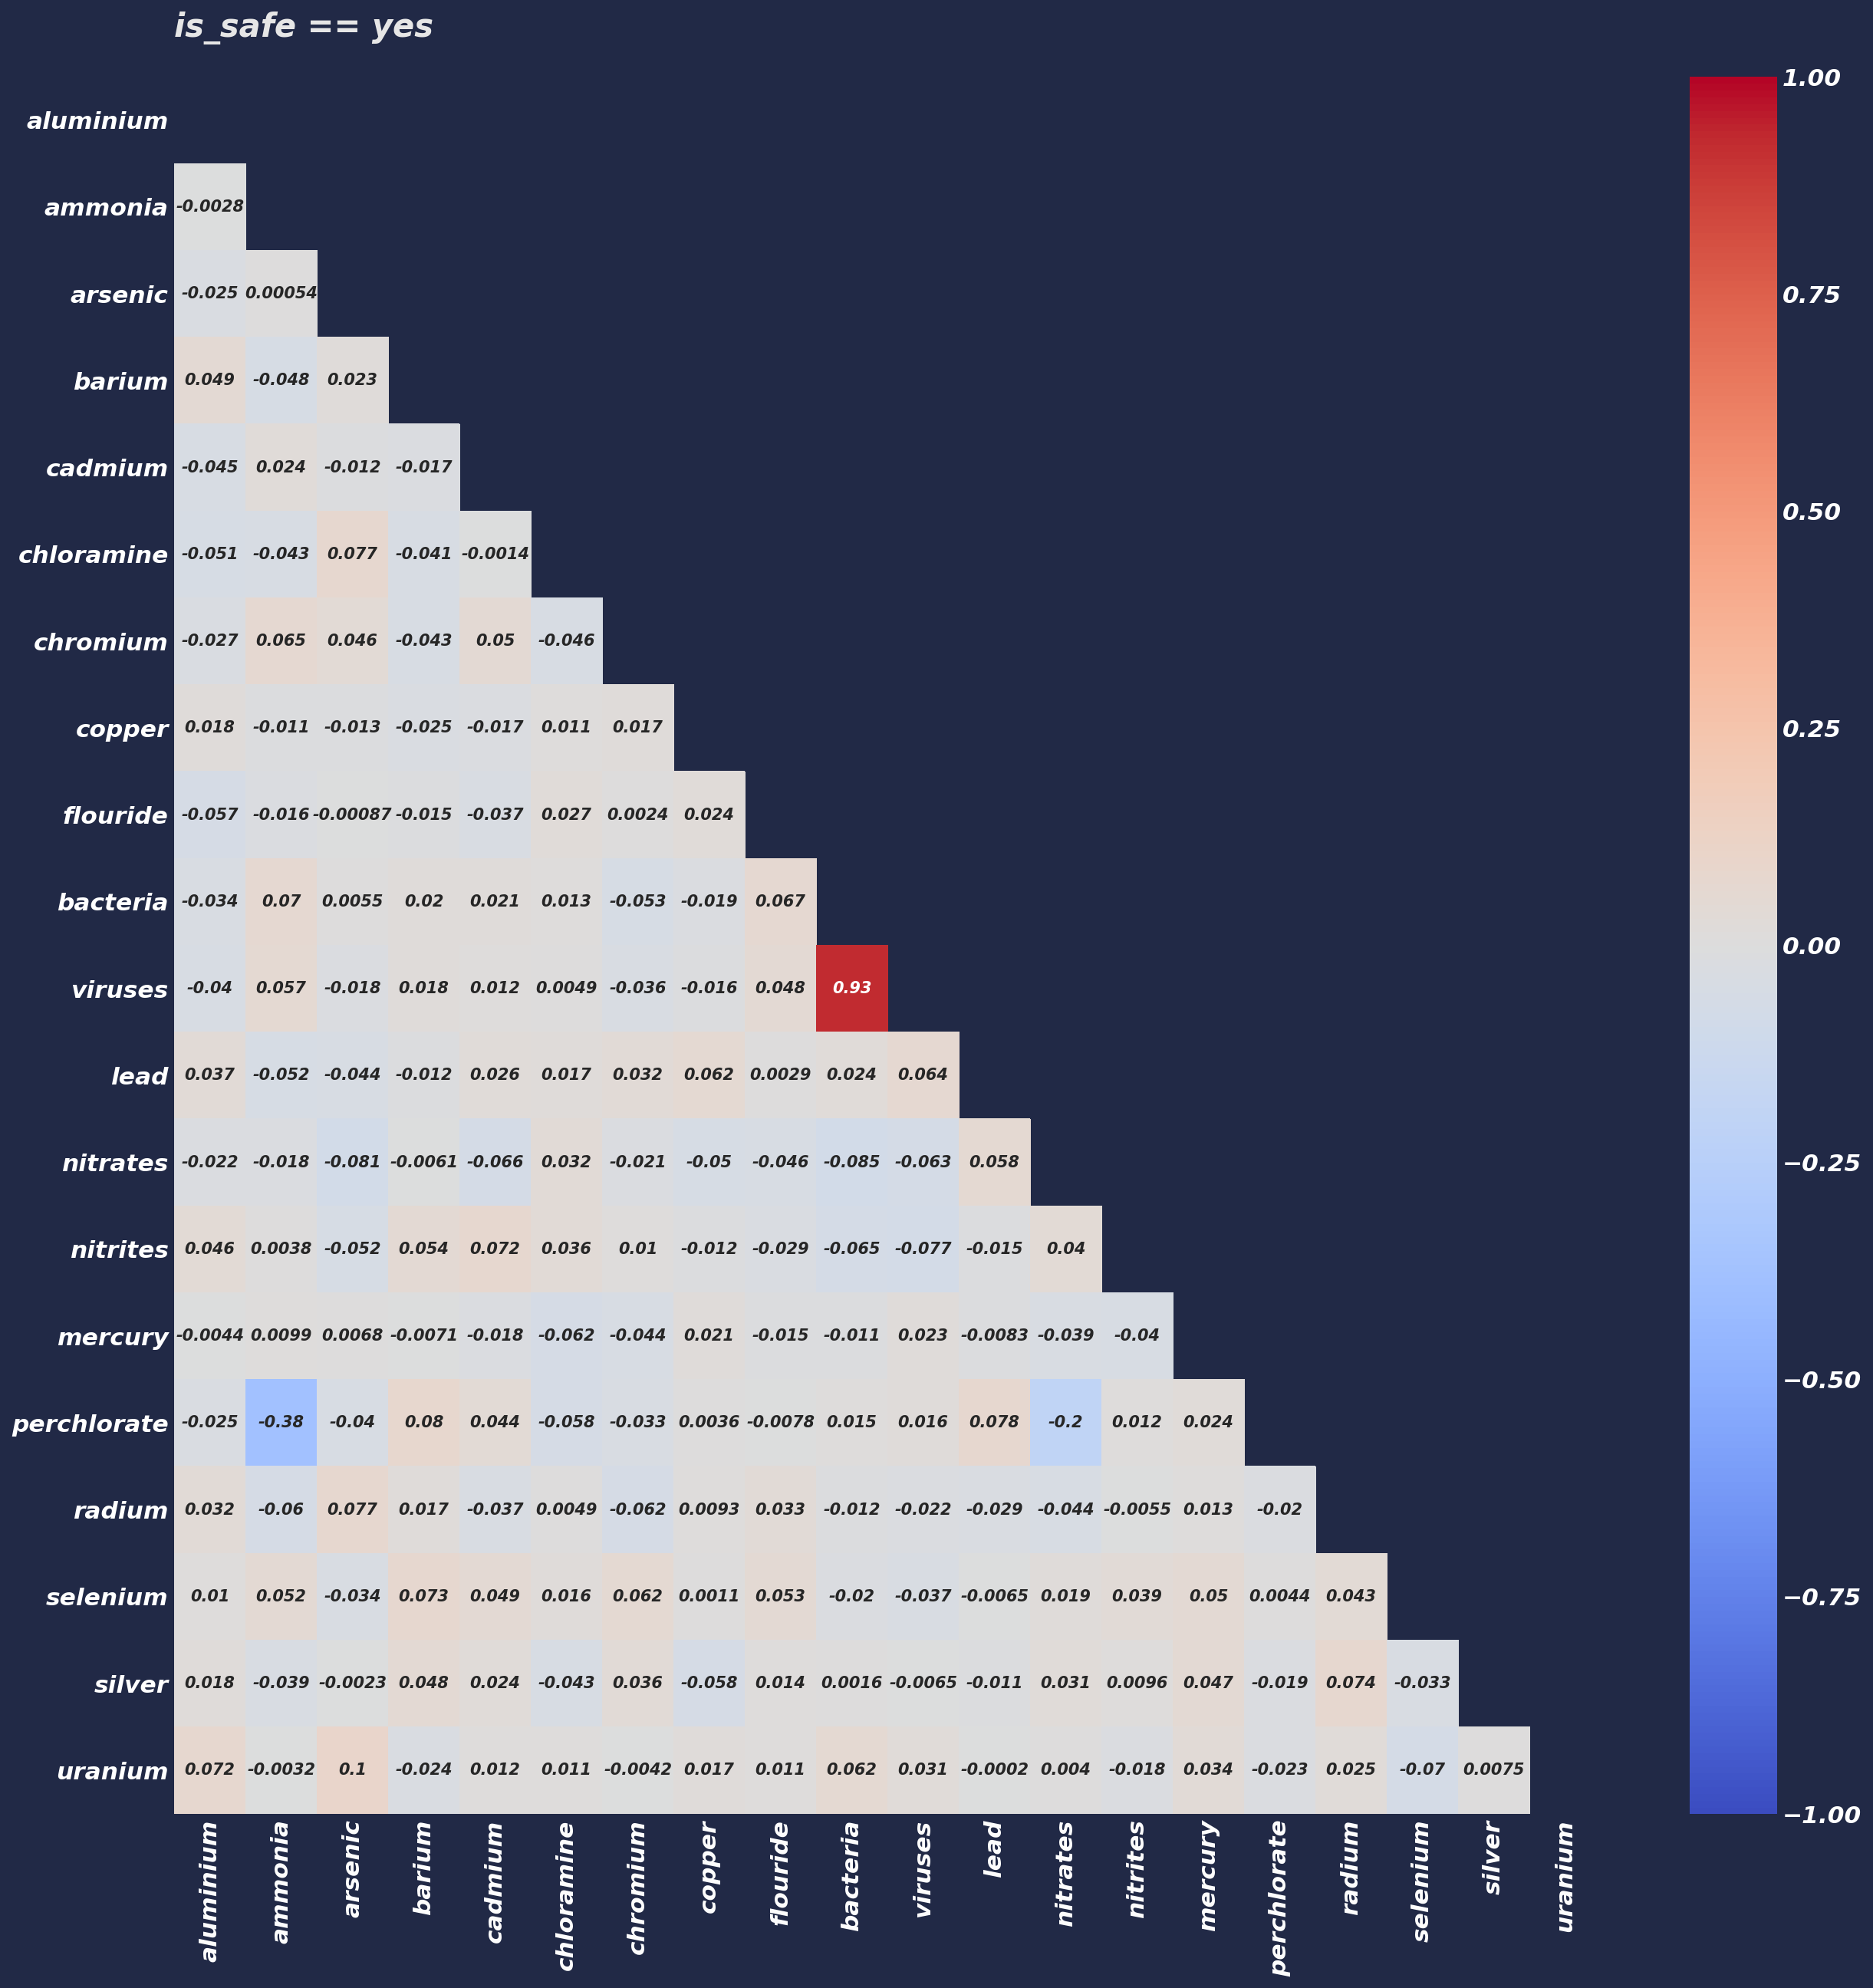

In [35]:
plt.figure(figsize=(20,20))

sns.heatmap(yes.corr(), mask=np.triu(yes.corr()), annot=True, cmap="coolwarm", vmin=-1, vmax=1) 
plt.title("is_safe == yes")

Text(0.0, 1.0, 'is_safe == no')

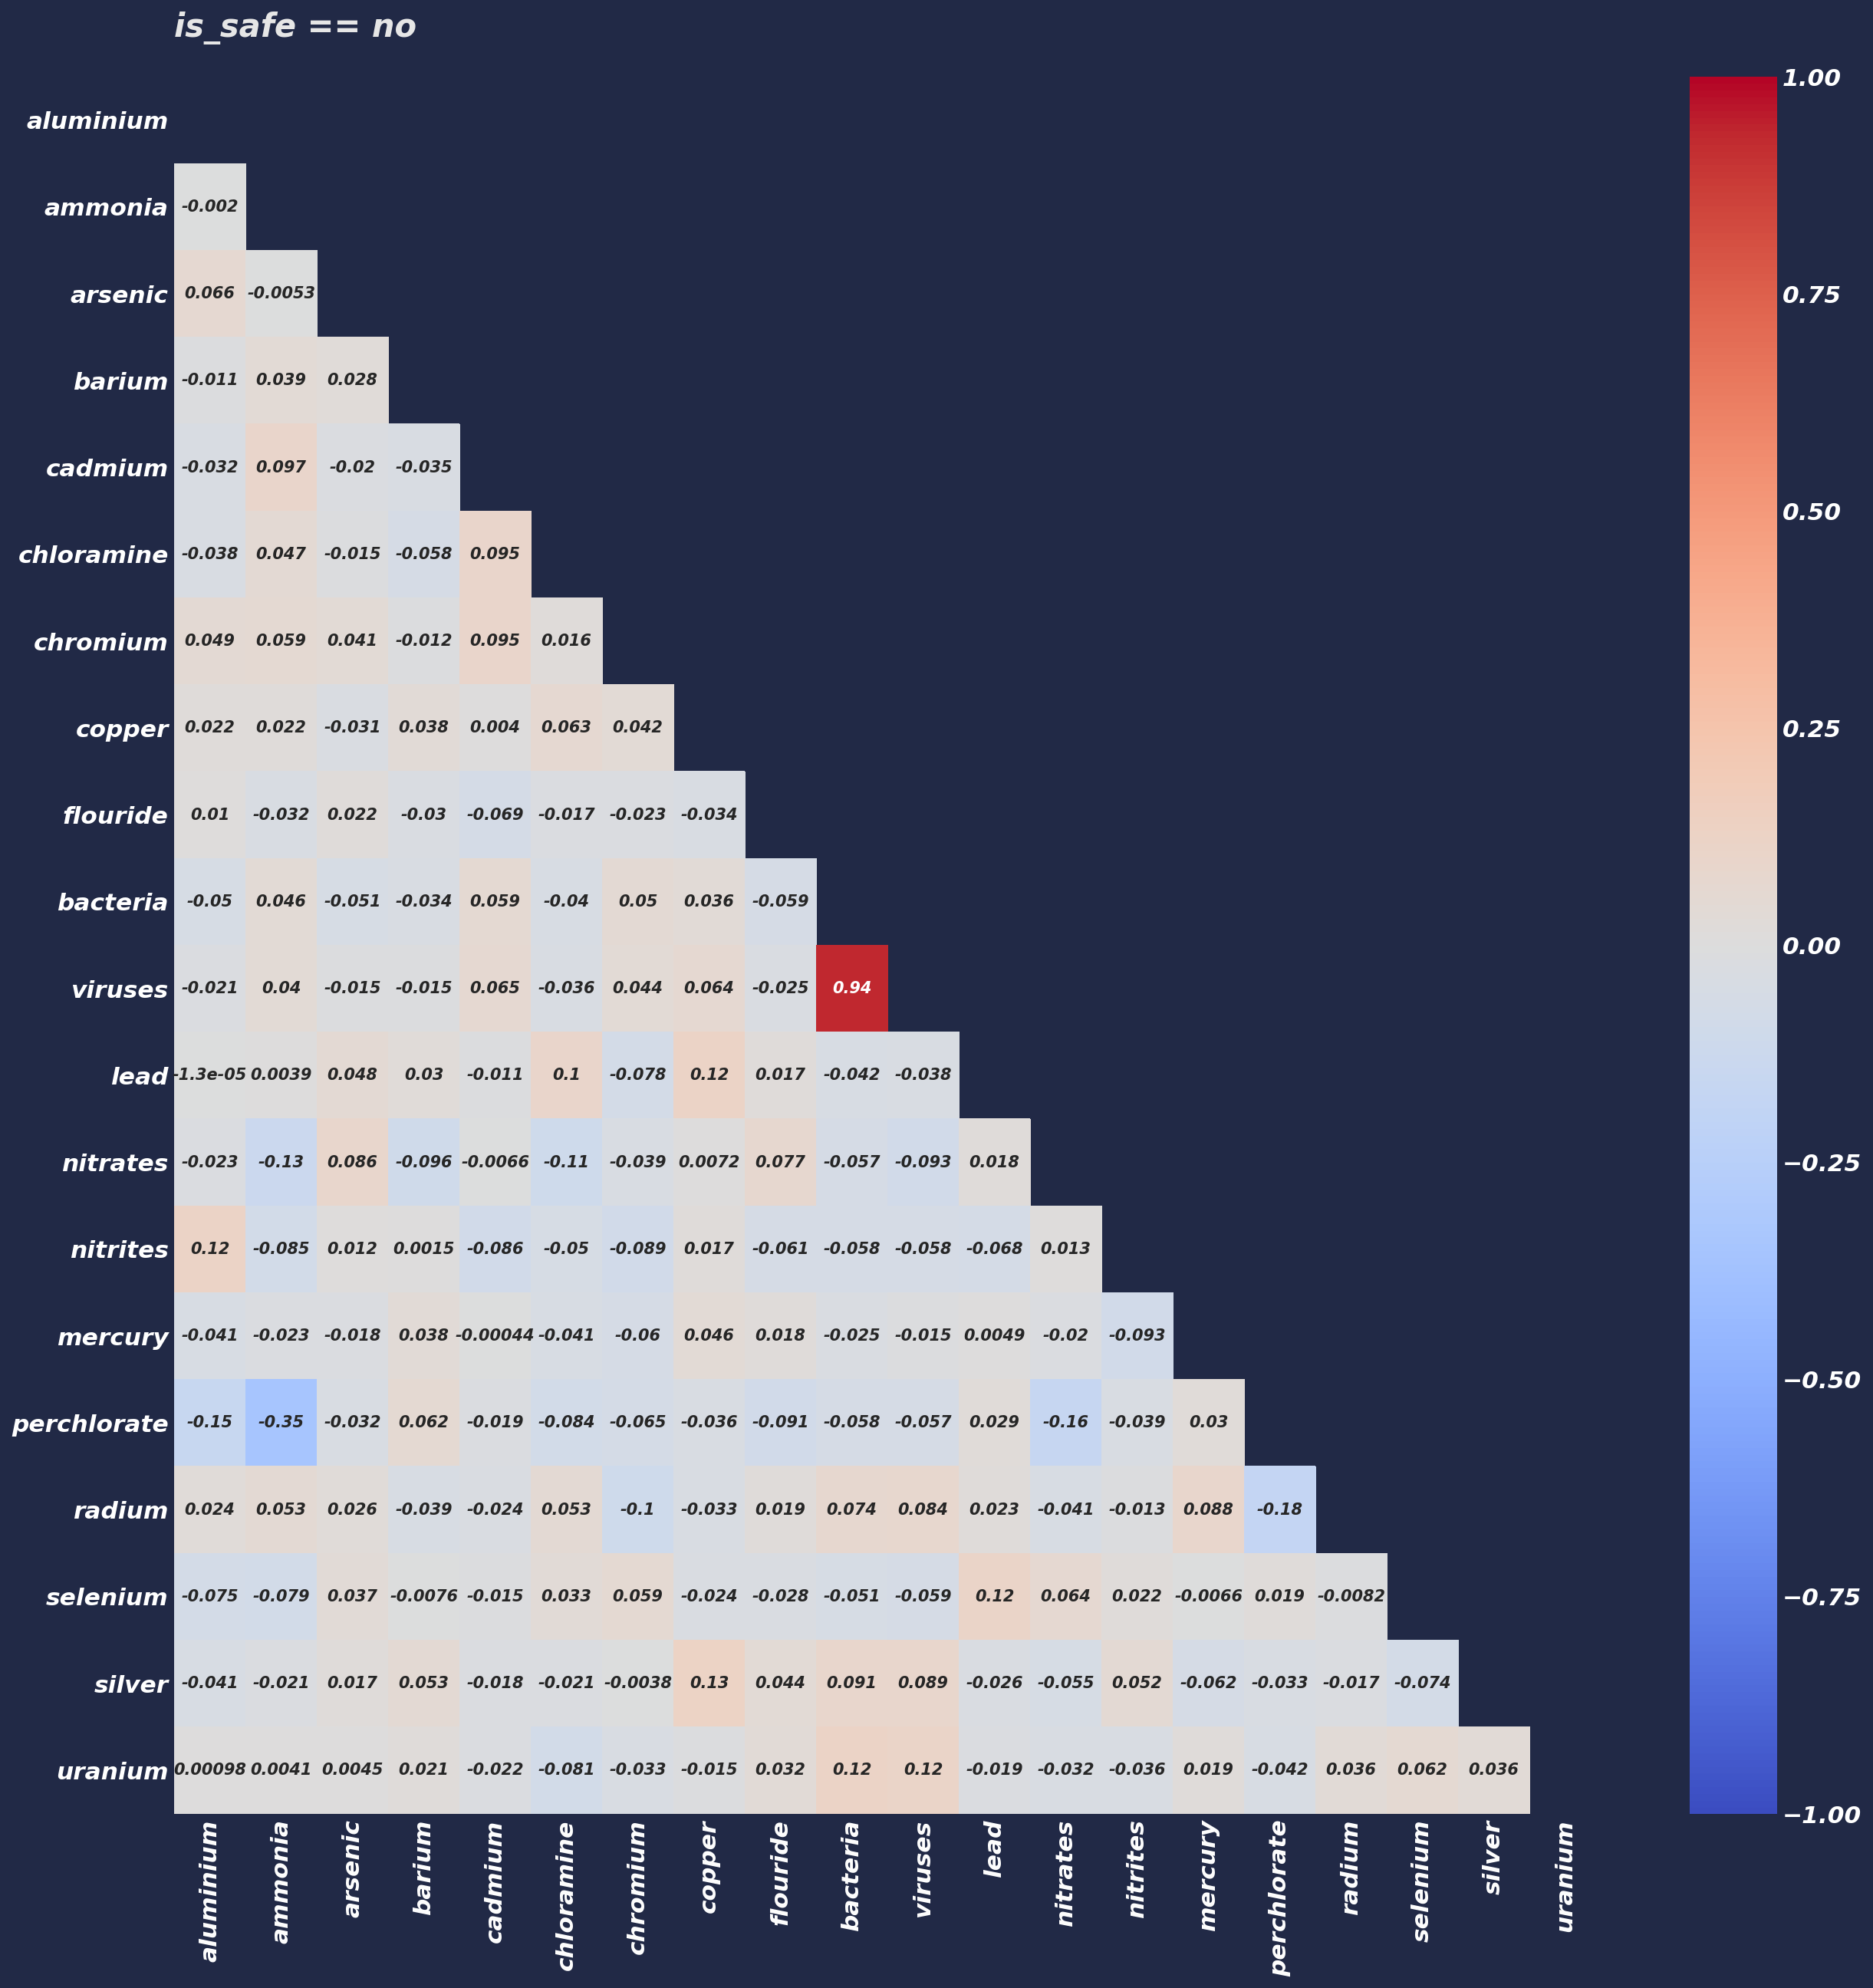

In [36]:
plt.figure(figsize=(20,20))

sns.heatmap(no.corr(), mask=np.triu(no.corr()), annot=True, cmap="coolwarm", vmin=-1, vmax=1) 
plt.title("is_safe == no")

## Model-Selection

In [6]:
x = df.drop("is_safe",axis=1)
y= df.is_safe

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=43) 

In [8]:
RF = RandomForestClassifier(random_state=18) 
DT = DecisionTreeClassifier(random_state=16) 
ADA = AdaBoostClassifier(random_state=21) 
GB = GradientBoostingClassifier(random_state=15) 
EXT = ExtraTreeClassifier(random_state=36) 

In [9]:
for models in [RF,DT,ADA,GB,EXT]:
    print(models)
    models.fit(x_train, y_train)
    # accuracy score
    print(f"Train Score: {models.score(x_train, y_train).round(3)}")
    print(f"Test Score:  {models.score(x_test, y_test).round(3)}\n")
                          

RandomForestClassifier(random_state=18)
Train Score: 1.0
Test Score:  0.928

DecisionTreeClassifier(random_state=16)
Train Score: 1.0
Test Score:  0.896

AdaBoostClassifier(random_state=21)
Train Score: 0.999
Test Score:  0.944

GradientBoostingClassifier(random_state=15)
Train Score: 1.0
Test Score:  0.948

ExtraTreeClassifier(random_state=36)
Train Score: 1.0
Test Score:  0.62



In [11]:
# model -2 
KNN = KNeighborsClassifier()
SVM = SVC(probability = True,kernel="linear")
LR = LogisticRegression(solver="liblinear")

In [12]:

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
for models in [KNN,SVM,LR]:
    print(models)
    models.fit(x_train, y_train)
    # accuracy score
    print(f"Train Score: {models.score(x_train, y_train).round(3)}")
    print(f"Test Score:  {models.score(x_test, y_test).round(3)}\n")
                          

KNeighborsClassifier()
Train Score: 0.888
Test Score:  0.792

SVC(kernel='linear', probability=True)
Train Score: 0.988
Test Score:  0.972

LogisticRegression(solver='liblinear')
Train Score: 0.989
Test Score:  0.988



In [25]:
# pilih logisticregression

LR = LogisticRegression(solver="liblinear")
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [26]:
print(f"Train Score: {LR.score(x_train, y_train).round(3)}")
print(f"Test Score:  {LR.score(x_test, y_test).round(3)}\n")


Train Score: 0.989
Test Score:  0.988



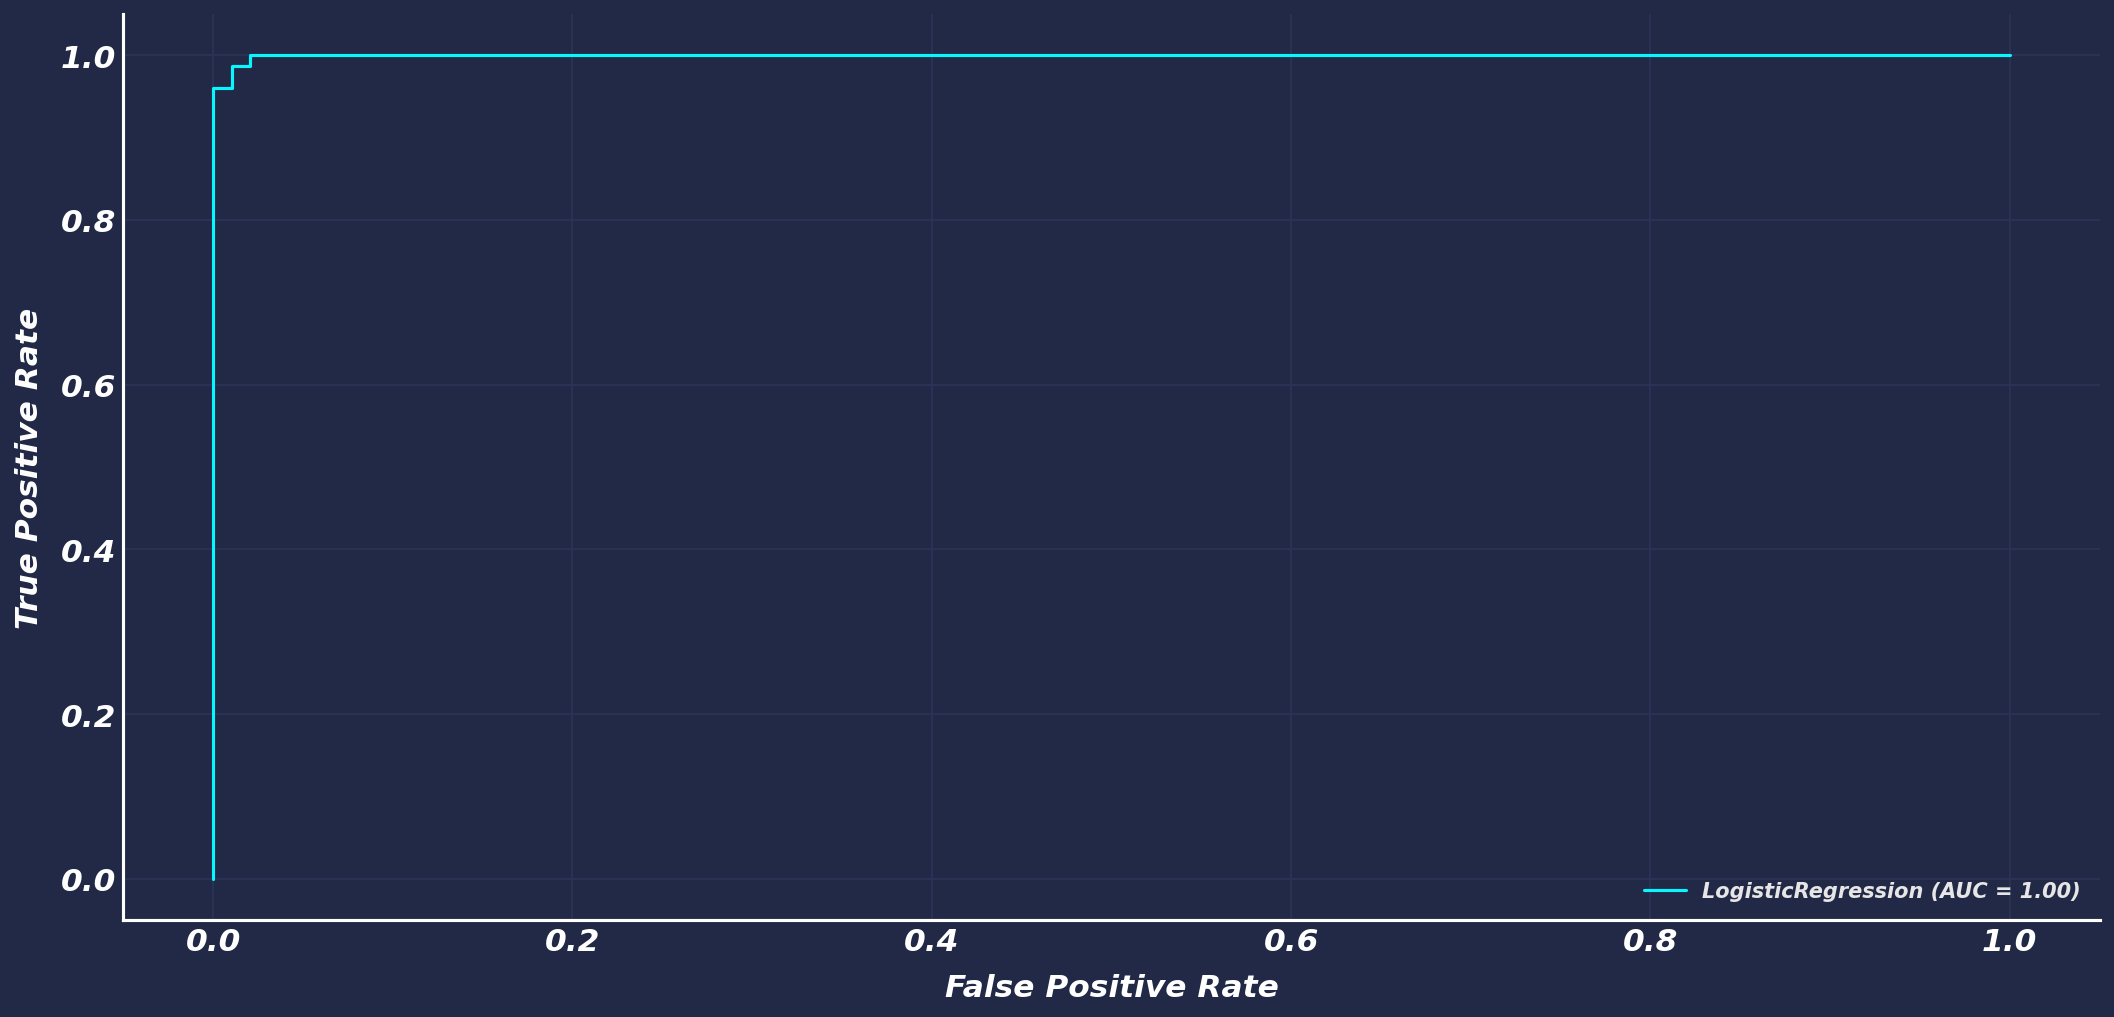

In [34]:
# plot roc auc curve

fig,ax = plt.subplots(1,1,figsize=(17,8))
plot_roc_curve(LR,x_test,y_test,ax=ax)

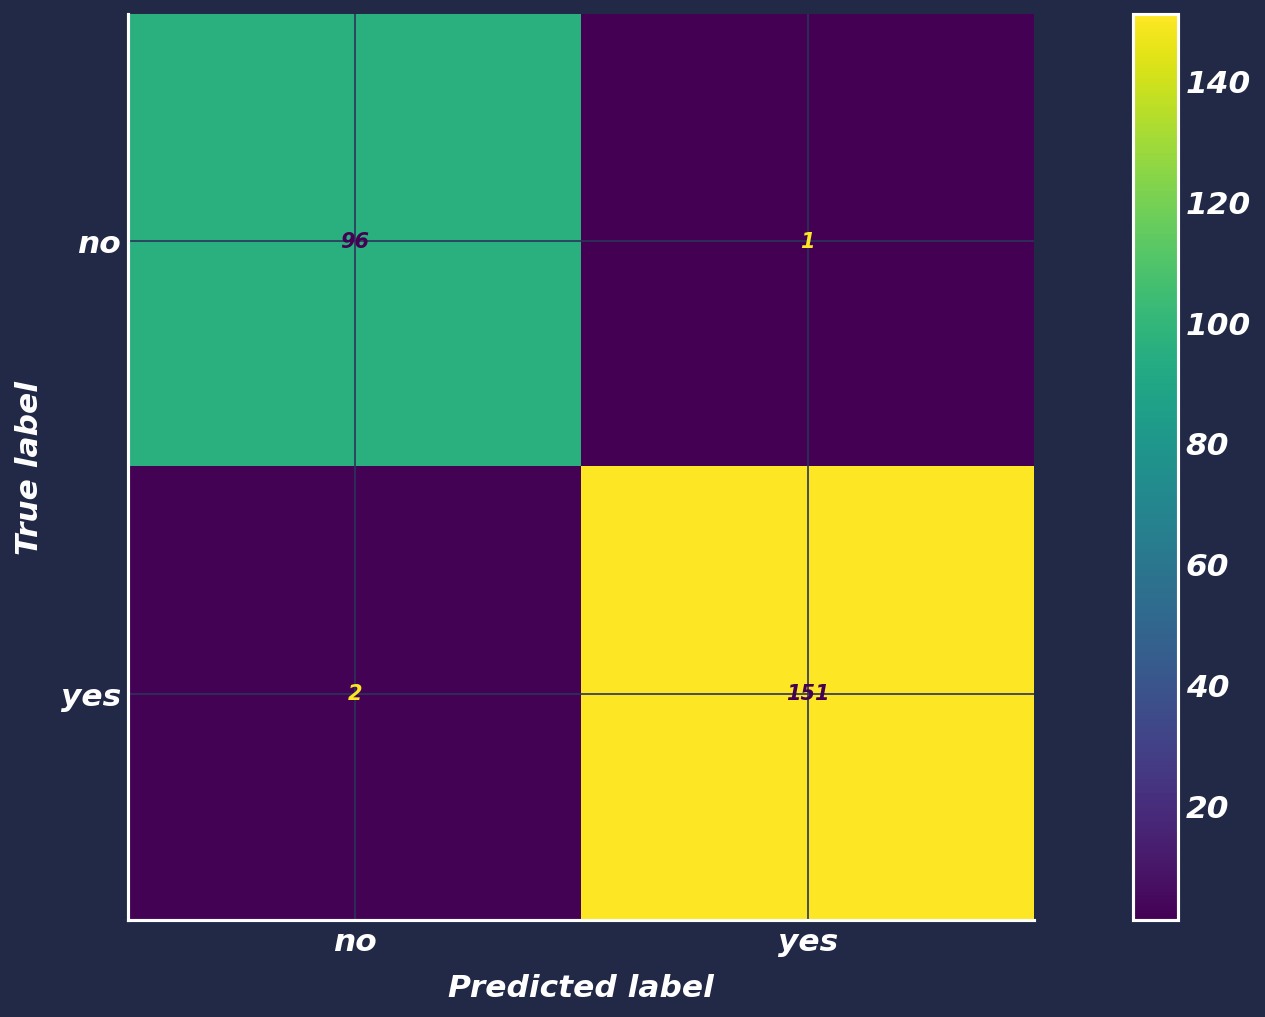

In [35]:
# plot confusion matrix

fig,ax = plt.subplots(1,1,figsize=(17,8))
plot_confusion_matrix(LR,x_test,y_test,ax=ax)

In [37]:
# classification report 

classification_report(y_test, LR.predict(x_test)) 

'              precision    recall  f1-score   support\n\n          no       0.98      0.99      0.98        97\n         yes       0.99      0.99      0.99       153\n\n    accuracy                           0.99       250\n   macro avg       0.99      0.99      0.99       250\nweighted avg       0.99      0.99      0.99       250\n'

In [67]:
# test untuk data tidak terlihat/unseen
tester = x.iloc[1:2,:]
tester = sc.transform(tester)



In [68]:
LR.predict(tester)

array(['yes'], dtype=object)